In [1]:
%load_ext autoreload
%autoreload 2
from numpy import genfromtxt
import matplotlib.pyplot as plt
#!pip install mplfinance
import mplfinance as mpf
from mplfinance.original_flavor import candlestick2_ochl, candlestick_ohlc
import numpy as np
import pandas as pd
import uuid
import time
import ta
from SR import *
from zigzag import *

In [18]:
%%bash
# clear data
cd data2
rm -rf *
mkdir train
cd train
mkdir buy
mkdir sell

# Zigzag + TA

In [3]:
#### Non-metatrader
# df1 = pd.read_csv("EURUSD60.csv",header=None, names=["date", "open", "high", "low", "close", "volume"], delimiter= "\t")
# df1 = df1.set_index("date")
# df1.index = pd.to_datetime(df1.index)
# idx = df1.index

# Metatrader
df1 = pd.read_csv("data/ND100.M5.csv",header=None, names=["date", "open", "high", "low", "close", "volume"])
df1.index = pd.to_datetime(df1.date)
df1 = df1.drop(columns=["date"])
df1['SMA'] = df1.loc[:,"close"].rolling(window=3).mean()
df1 = df1.fillna(0)

KeyboardInterrupt: 

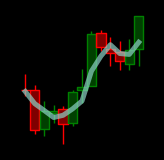

In [19]:
%%time
##### BUY/SELL TRAINING DATA
dim = 2
lookback = 12
df = df1.reset_index().copy()

# custom colors (mainly to make the background black)
# Create my own `marketcolors` to use with the `nightclouds` style:
mc = mpf.make_marketcolors(up='g',down='r',inherit=True, alpha=0.5)

# Create a new style based on `nightclouds` but with my own `marketcolors`:
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

for i in range(lookback, len(df1)-lookback):
     
    apds = [mpf.make_addplot(df[i-lookback:i+1].SMA, alpha=0.7)]
    
    if df.loc[i+1,"close"] < df.loc[i,"close"]:
        path = "sell"
    elif df.loc[i+1,"close"] > df.loc[i,"close"]:
        path = "buy"

#     if i == 22:
#         mpf.plot(df1[i-lookback:i+1], addplot=apds, type="candle", style=s, scale_width_adjustment=dict(volume=1,candle=1.5), axisoff=True, figsize=(dim,dim), volume=False)
#         print(df.loc[i,"close"])
#         print(df.loc[i+1,"close"])
#         print(df.loc[i+1,"close"] < df.loc[i,"close"])
#         break

    mpf.plot(df1[i-lookback:i+1], addplot=apds, type="candle", style=s, scale_width_adjustment=dict(volume=1,candle=1.5), axisoff=True, figsize=(dim,dim), volume=False, savefig=dict(fname="data2/train/" + path + "/" + str(i) + '.png',bbox_inches='tight', pad_inches=0))
        

In [30]:
%%time
##### BUY/SELL TRAINING DATA
dim = 10
lookback = 100
for i in signal.index:
    df = df1[i-lookback:i].copy()

    apds = [ mpf.make_addplot(df.volume_obv, panel=2, alpha=.2),
         mpf.make_addplot(df.trend_psar_down,type='scatter',markersize=2,marker='v', alpha=.2),
         mpf.make_addplot(df.trend_psar_up,type='scatter',markersize=2,marker='^', alpha=.2),
         mpf.make_addplot(df.trend_macd,panel=3,color='g', alpha=.2),
         mpf.make_addplot(df.trend_visual_ichimoku_a, panel=0, alpha=.2),
         mpf.make_addplot(df.trend_visual_ichimoku_b, panel=0 ,alpha=.2),
         mpf.make_addplot(df.trend_ema_slow, panel=0 ,alpha=.2),
         mpf.make_addplot(df.trend_ema_fast, panel=0 ,alpha=.2)
       ]
    if i > lookback:
        if df1.iloc[i][1] == 1:
            path = "buy"
        else:
            path = "sell"
            
        mpf.plot(df, addplot=apds, type="candle", scale_width_adjustment=dict(volume=1,candle=1.5), axisoff=True, figsize=(dim,dim), style="charles", mav=(5), volume=True, savefig=dict(fname="data/train/" + path + "/" + str(i) + '.png',bbox_inches='tight', pad_inches=0))
        

CPU times: user 4min 21s, sys: 2.7 s, total: 4min 24s
Wall time: 4min 24s


In [31]:
%%time
##### HOLD TRAINING DATA

# limit to keep the same balace of classes
limit = len(signal.index)//2
count = 0
path = "hold"
for i in range(len(df1)):
    if count < limit:
        if i > lookback+300:
            
            # only use data that we need for studies
            df = df1[i-lookback:i].copy()
            
            # skip buy/sell data
            if df1[1][i] != 1 and df1[1][i] != -1:
                apds = [ mpf.make_addplot(df.volume_obv, panel=2, alpha=.2),
                 mpf.make_addplot(df.trend_psar_down,type='scatter',markersize=2,marker='v', alpha=.2),
                 mpf.make_addplot(df.trend_psar_up,type='scatter',markersize=2,marker='^', alpha=.2),
                 mpf.make_addplot(df.trend_macd,panel=3,color='g', alpha=.2),
                 mpf.make_addplot(df.trend_visual_ichimoku_a, panel=0, alpha=.2),
                 mpf.make_addplot(df.trend_visual_ichimoku_b, panel=0 ,alpha=.2),
                 mpf.make_addplot(df.trend_ema_slow, panel=0 ,alpha=.2),
                 mpf.make_addplot(df.trend_ema_fast, panel=0 ,alpha=.2)]
                count +=1

                mpf.plot(df, addplot=apds, type="candle", scale_width_adjustment=dict(volume=1,candle=1.5), axisoff=True, figsize=(dim,dim), style="charles", mav=(5), volume=True, savefig=dict(fname="data/train/" + path + "/" + str(i) + '.png',bbox_inches='tight', pad_inches=0))


CPU times: user 2min 16s, sys: 1.6 s, total: 2min 17s
Wall time: 2min 17s


# Below is for tesing which indicators and lookback  to use

In [ ]:
df1.columns

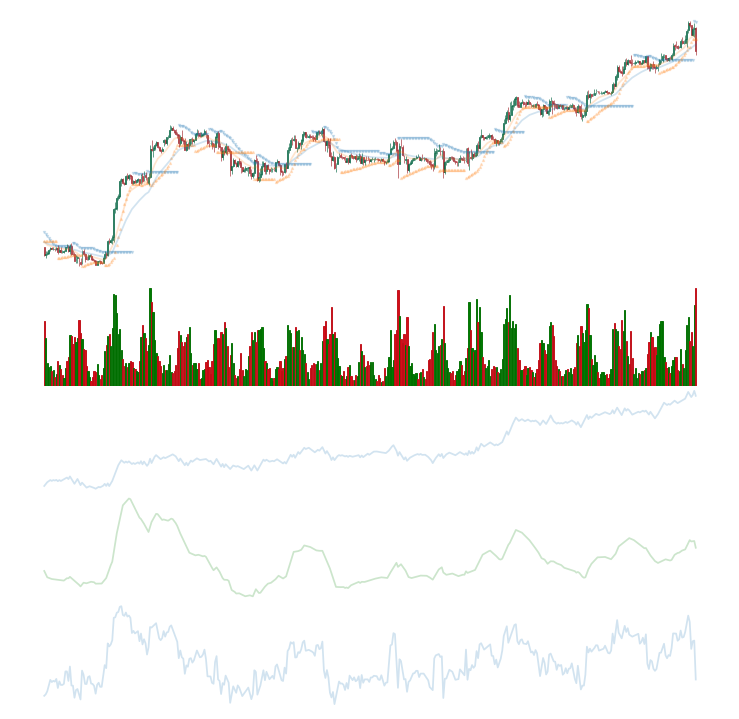

In [38]:
lookback = 432
i = signal.index[10]
df = df1[i-lookback:i].copy()

apds = [ mpf.make_addplot(df.volume_obv, panel=2, alpha=.2),
         mpf.make_addplot(df.trend_psar_down,type='scatter',markersize=2,marker='v', alpha=.2),
         mpf.make_addplot(df.trend_psar_up,type='scatter',markersize=2,marker='^', alpha=.2),
         mpf.make_addplot(df.trend_macd,panel=3,color='g', alpha=.2),
         #mpf.make_addplot(df.trend_visual_ichimoku_a, panel=0, alpha=.2),
         #mpf.make_addplot(df.trend_visual_ichimoku_b, panel=0 ,alpha=.2),
         mpf.make_addplot(df.trend_ema_slow, panel=0 ,alpha=.2),
         mpf.make_addplot(df.trend_ema_fast, panel=0 ,alpha=.2),
         mpf.make_addplot(df.momentum_rsi, panel=4 ,alpha=.2)
       ]
mpf.plot(df, addplot=apds, type="candle", scale_width_adjustment=dict(volume=1,candle=1.5), axisoff=True, figsize=(10,10), style="charles", volume=True)#, savefig=dict(fname=path + "/" + str(i) + '.png',bbox_inches='tight', pad_inches=0))




visualize trades, l is the number of the direction change in the signal dataframe